# Genetic algorithm to solve the n-queens problem

The following code aims to solve the n-queens problem using an evolutionary algorithm. 

I made this mainly to understand how this kind of algorithms work.

## Initialize the population

In order to represent the chessboard we use an array with 8 values $X = [X_1, .. , X_N]$, $X_i \in \mathbb{Z}$, $i = 1..N$ where $X_i$ is the row where the queen is placed on the board and each column is set by $i$ subindex.

Since two queens that are in the same row or column would be attacking each other, the array $X$ is a permutation of $N$ where $N$ is the number of queens and thus the length of the board.

In [1]:
def initialization(n_population, n_queens):
    # Function to initialize the population. Each member of the population
    # is a candidate initialized randomly with a permutation of the number
    # of queens (N)
    population = [np.random.permutation(n_queens)]
    for i in range(n_population-1):
        population = np.concatenate((population, [np.random.permutation(n_queens)]))
    return population

## Define the evaluation function (fitness function)

The fitness function we evaluate is going to count the number of queens that are attacking to each other. If we consider two queens $A, B$ placed in the row $x_A, x_B$ and column $y_A, y_B$  they would be attacking each other if they are placed in the adjacent squares of the board ($abs(x_A, x_B) = abs(y_A, y_B) <= 1$) or in the same diagonal ($abs(x_A, x_B) = abs(y_A, y_B)$)

In [2]:
def is_attacking(x1, y1, x2, y2):
    # It returns true if 2 Queens are attacking each other.
    # The representation of the problem assumes that each index of the N-array 
    # is each column of the board and that the value inside the index is the
    # position of the queen counting the rows.
    # Two queens attack each other if they are in the same diagonal => the difference
    # of their absolute positions is equal |x1-x2| = |y1-y2| 
    # or if they are in the positions of the board with distance 
    #1 or less with respect to the reference queen.
    return (abs(x1-x2) == abs(y1-y2)) or (abs(x1-x2) <= 1 and abs(y1-y2) <= 1)

def fitness_function(population):
    # The fitness will be defined as the numbers of queens in the board that
    # are attacking to each other. They attack each other if they are placed in the
    # same diagonal or in the squares of the board at distance 1 or less.
    fitness = np.zeros(len(population))
    for r in range(len(population)):
        rows = population[r]
        # Compare each queen with the others and store how many are attacking each other
        # in the fitness array
        for i in range(len(rows)-1):
            for j in range(i+1, len(rows)):
                fitness[r] += 1 if is_attacking(i, rows[i], j, rows[j]) else 0
    return fitness

## Parent selection

We use tournament selection to get the parents that will recombine.

We select 5 genes of the population and select two of them with the highest fitness.

## Recombination

To recombinate we follow the tail swapping strategy which has to be modified to ensure the consistency of the problem (i.e. if we swap tails from a random point $k$ the array $X$ have the chance of not being a permutation anymore). To keep the consistency of the permutation $X$ we copy the first part of the tail and the elements of the second gen that are not already in the copied tail. 

## Mutation

The recombined genes (the generated children) have a chance of 0.8 to be mutated. This means that with a chance of 0.8 two randomly selected queens (out of the 8) will be swapped.

## Select individuals for the next generation

The selection strategy followed consist on replacing the worst 2 parents in the population for the new generated children. In some cases the replaced parents could have worst *fitness* than the children. Thats why in the execution graph we can appreciate that, sometimes, the worst case has a higher fitness than previos iterations.

In [3]:
def replace_gen(population, children):
    # Select the 2 worst fitness out of the population and change them
    # for the new generated children
    population[fitness.argsort()[-2:]] = children
    return population

## Main code

Iteration 0 Best 3.0 Mean 7.83 Median 8.0 Worst 18.0
Iteration 100 Best 2.0 Mean 5.09 Median 5.0 Worst 7.0
Iteration 200 Best 2.0 Mean 4.38 Median 5.0 Worst 6.0
Iteration 300 Best 1.0 Mean 3.97 Median 4.0 Worst 6.0
Iteration 400 Best 1.0 Mean 3.69 Median 4.0 Worst 7.0
Iteration 500 Best 1.0 Mean 3.51 Median 4.0 Worst 8.0
Iteration 600 Best 1.0 Mean 3.24 Median 3.0 Worst 7.0
Iteration 700 Best 1.0 Mean 2.95 Median 3.0 Worst 7.0
Iteration 800 Best 1.0 Mean 2.74 Median 3.0 Worst 6.0
Iteration 900 Best 1.0 Mean 2.76 Median 3.0 Worst 12.0


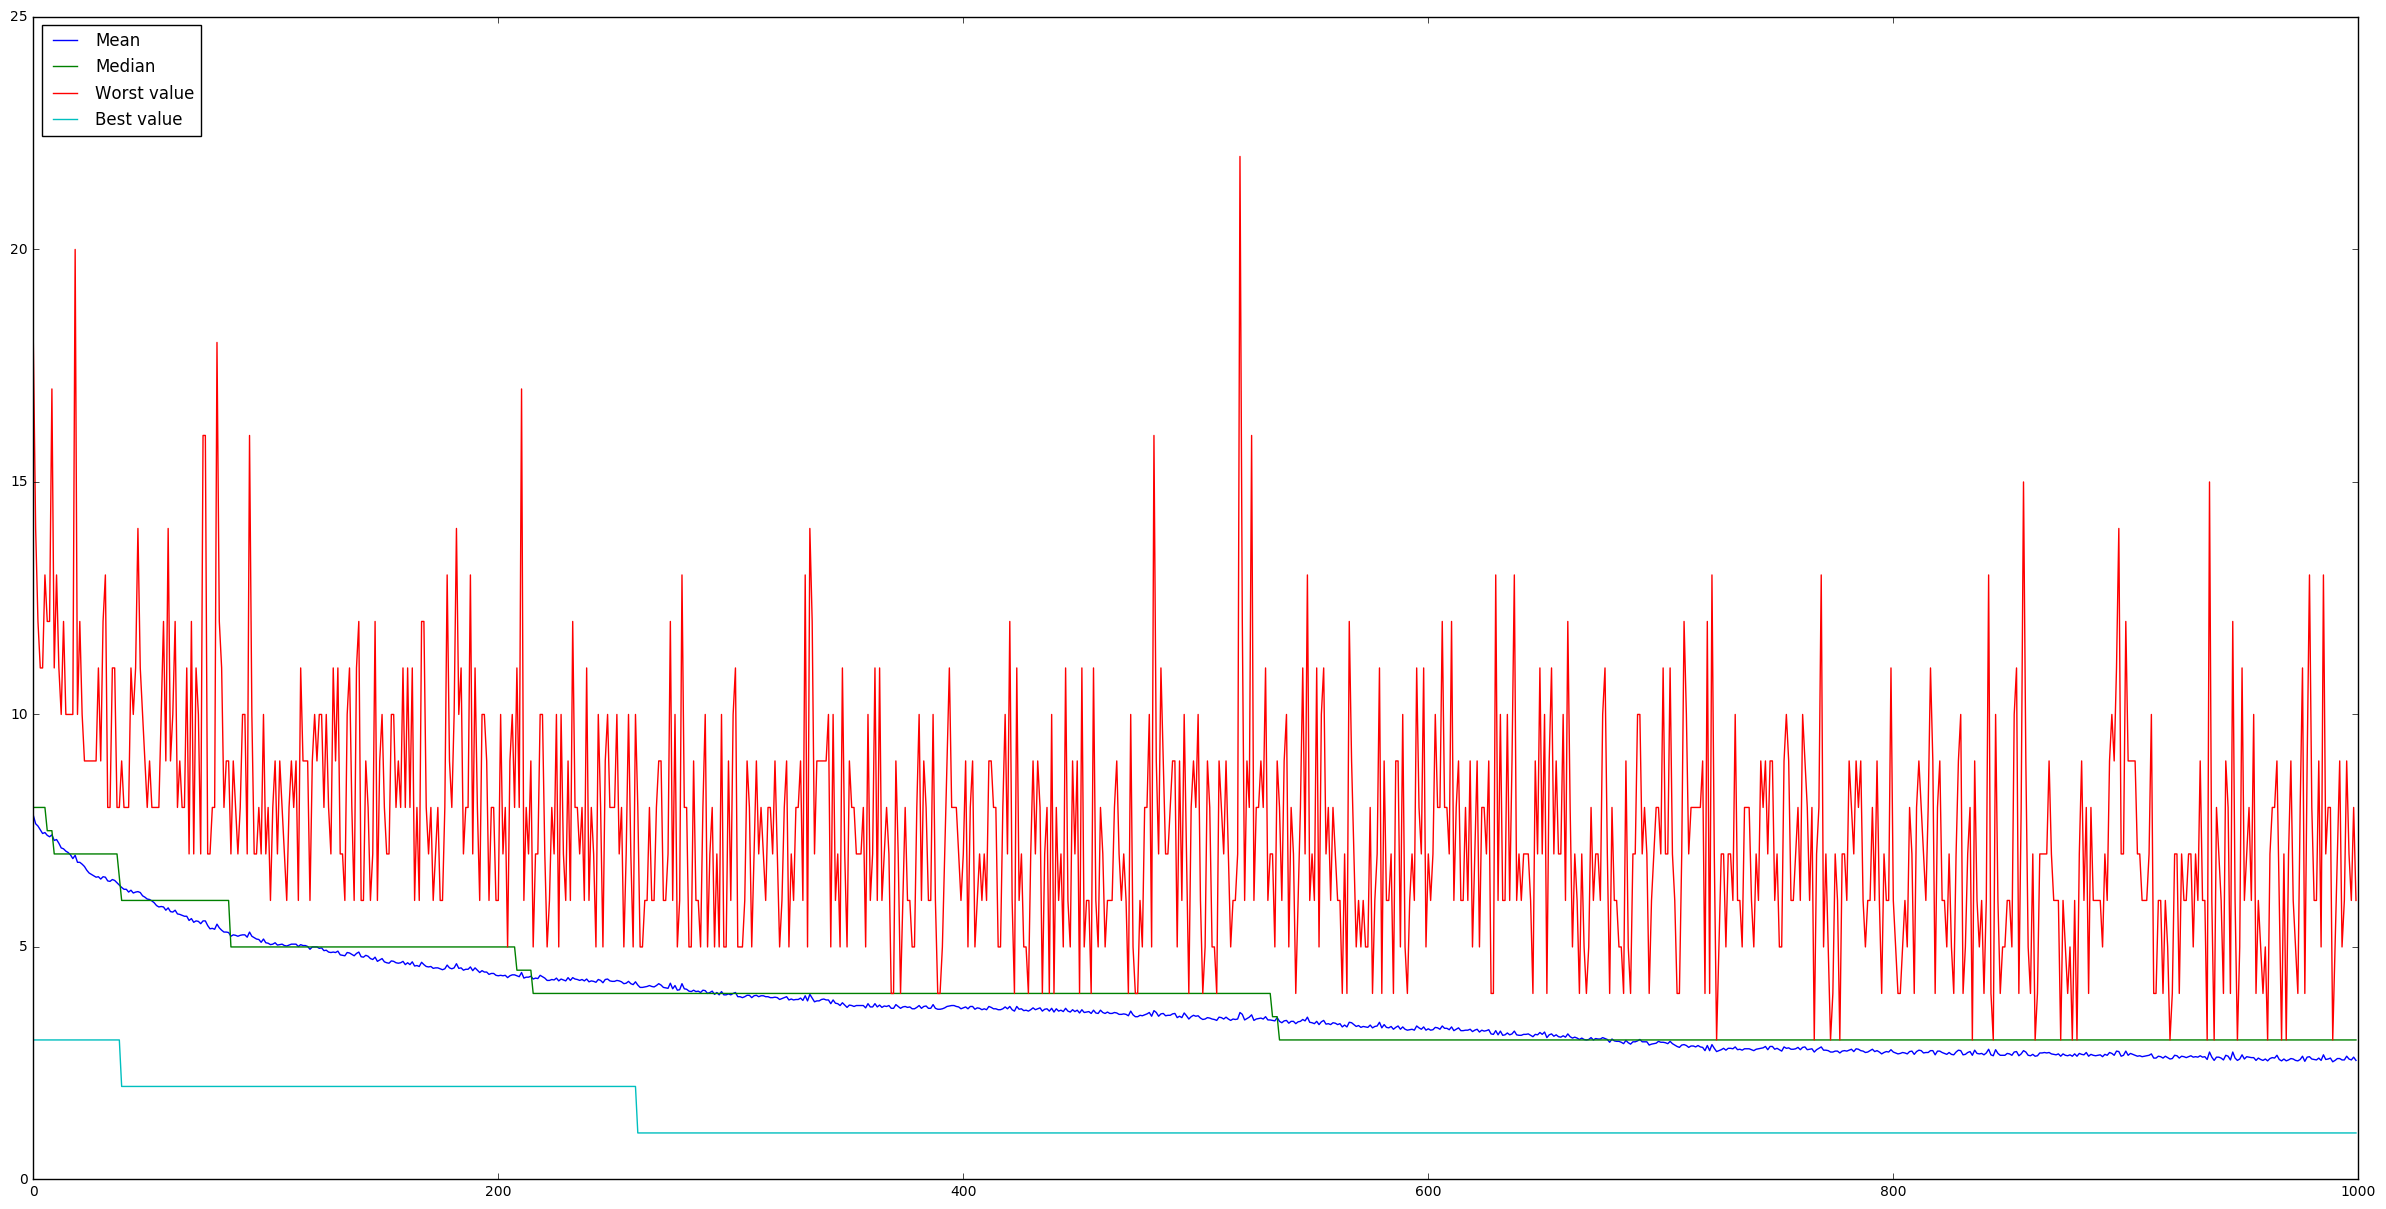

Wall time: 7.8 s


In [4]:
%%time

import numpy as np
import matplotlib.pyplot as plt
import evolutionary.mutations as mutation
import evolutionary.crossovers as crossover
import evolutionary.selections as selection

%matplotlib inline

# Initalize vars
n_queens = 12
n_population = 100
n_iterations = 1000
mean = np.empty(0)
median = np.empty(0)
worst = np.empty(0)
best = np.empty(0)

# Create all the population 
population = initialization(n_population, n_queens)

# Iterate simulating the evolutionary process
for i in range(n_iterations):
    fitness = fitness_function(population)
    
    mean = np.append(mean, np.mean(fitness))
    median = np.append(median, np.median(fitness))
    worst = np.append(worst, np.max(fitness))
    best = np.append(best, np.min(fitness))
    if i%100 == 0:
        print "Iteration", i, "Best", best[i], "Mean", mean[i], "Median", median[i], "Worst", worst[i]
    
    if best[i] == 0: break
    parents = selection.tournament(population, fitness, 5, 1, iterations=2)
    children = crossover.simple_permutation(parents)
    children = mutation.pos_swapping(children, 0.8)
    population = replace_gen(population, children)

if i > 0:
    x = np.arange(0,i+1)
    plt.figure(1,[30, 15])
    plt.plot(x, mean)
    plt.plot(x, median)
    plt.plot(x, worst,)
    plt.plot(x, best)
    plt.legend(['Mean', 'Median', 'Worst value', 'Best value'], loc='upper left')

    plt.show()